In [133]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import haversine as hs
import geopandas as gp
from shapely.geometry import MultiPoint, Point, Polygon
import numpy as np
from sklearn.cluster import DBSCAN
from shapely import wkt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from watertap3.truck_pipe_cost_functions import elevation
from IPython.display import clear_output

from wells_dijkstra_algorithm import *
import pprint

C:\Users\mhardika\AppData\Local\Temp\1\ipykernel_13368\1551822069.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x = state_df['Longitude'], y = state_df['Latitude'], c = 'lightblue', s=80, cmap=cm,edgecolor ='black',alpha = 0)


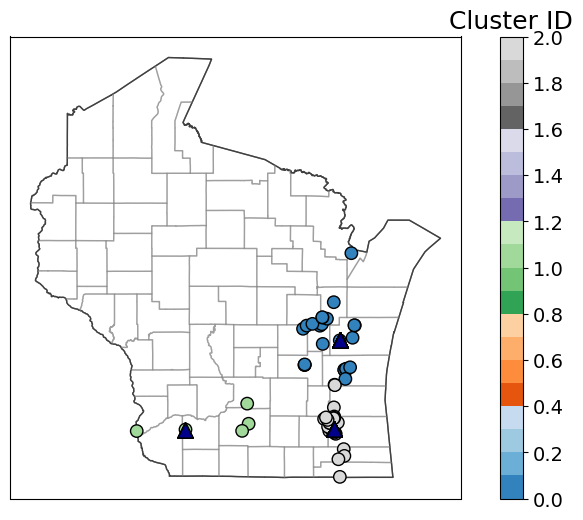

In [420]:
# Plot clusters in Wisconsin
# Reading file with Wisconsin clusters

df = pd.read_csv(r'\Users\mhardika\Documents\AMO\wi_kmeans_20Nov23.csv',index_col=0)
state_df = df[df['state_alpha']=='WI'] #55
# state_df = df[df['state_alpha']=='TX'] #48

us_counties = gp.read_file(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\GeoData\US_County_Boundaries\US_CountyBndrys.shp')
us_counties = us_counties.to_crs("EPSG:4326")
us_states = gp.read_file(r'C:\Users\mhardika\Documents\AMO\2050\analysis_files\tl_rd22_us_state\tl_rd22_us_state.shp')

state_code = '55'
state_geo = us_counties.loc[us_counties['STATEFP']==state_code]
state_border = us_states.loc[us_states['STATEFP']==state_code]

centers_long = []
centers_lat = []

for idx , row in state_df.iterrows():
    centers_long.append(row['centroid_long'])
    centers_lat.append(row['centroid_lat'])

fig, ax = plt.subplots( figsize = (10,6))
ax.axes.set_facecolor(color='white')

cm = plt.cm.get_cmap('tab20c')

state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)

sc = ax.scatter(x = state_df['Longitude'], y = state_df['Latitude'], c= state_df['cluster_id'].values, s=80, cmap=cm,edgecolor ='black')
ax.scatter(centers_long, centers_lat, c='darkblue', s=120, marker = '^',edgecolor ='black')

ax.scatter(x = state_df['Longitude'], y = state_df['Latitude'], c = 'lightblue', s=80, cmap=cm,edgecolor ='black',alpha = 0)

# cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8]) 
cbar = plt.colorbar(sc,ax=ax,ticks = plt.MaxNLocator(11))
cbar.ax.set_title('Cluster ID',fontsize = 18)
cbar.ax.tick_params(labelsize=14)

plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

In [28]:
# def find_centroid(coords,cluster_range = 5):
#     kms_per_radian = 6371.0088
#     range_km = cluster_range*1.609343502101154
#     epsilon = range_km/ kms_per_radian

#     db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
#     cluster_labels = db.labels_

#     # get the number of clusters
#     num_clusters = len(set(cluster_labels))

#     # turn the clusters in to a pandas series, where each element is a cluster of points
#     clusters = pd.Series((coords[cluster_labels==n] for n in range(num_clusters)))
#     centroids = []

#     for ea in clusters:
#         centroids.append((MultiPoint(ea).centroid.x, MultiPoint(ea).centroid.y))

#     centroids = np.array(centroids)
#     return [centroids,cluster_labels]

In [32]:
# # Iterate through clusters in WI and create group
# sub_cluster_df = pd.DataFrame(columns = ['sub_cluster_id','centroid'])

# for cluster_id in state_df['cluster_id'].unique():
    
#     coords_input = state_df[state_df['cluster_id']==cluster_id][['Latitude', 'Longitude']].to_numpy()
#     centroids,cluster_labels = find_centroid(coords_input,25)

#     loc = [Point(xy) for xy in zip(centroids[:,1],centroids[:,0])]
#     loc = gp.GeoDataFrame(geometry = loc, crs='EPSG:4326')
#     loc.geometry = loc.geometry.to_crs('EPSG:4326')

#     # Assign cluster label
#     temp = pd.DataFrame(columns = ['sub_cluster_id','centroid'])
#     # temp['cluster_id'] = 0
#     temp['sub_cluster_id'] = cluster_labels
#     temp['centroid'] = loc.geometry[cluster_labels].values

#     sub_cluster_df= pd.concat([sub_cluster_df,temp])
#     # sub_cluster_df.reset_index()


# sub_cluster_df
# sub_cluster_df['centroid'].values.x

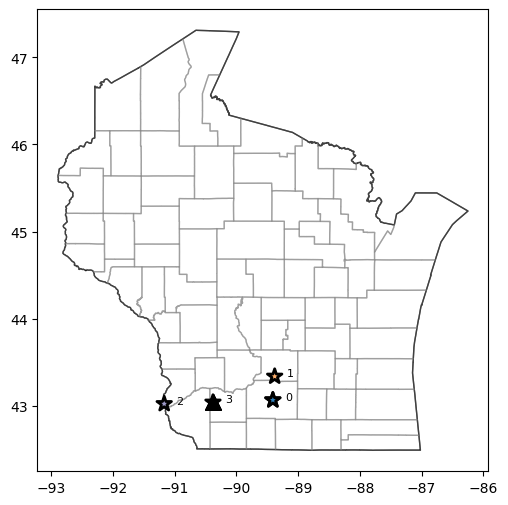

In [423]:
fig, ax = plt.subplots( figsize = (10,6))
ax.axes.set_facecolor(color='white')
cm = plt.cm.get_cmap('tab20c')
state_border.plot(ax=ax,facecolor ='none',edgecolor ='black')
state_geo.plot(ax=ax,facecolor ='none',edgecolor ='gray',alpha = 0.5)

wi_df_0 = state_df[(state_df['cluster_id']==1)]
# sc = ax.scatter(x = wi_df_0['Longitude'], y = wi_df_0['Latitude'], s=100, 
#                 c=wi_df_0['sub_cluster_id'].values,cmap=cm,edgecolor ='black')

for i, txt in enumerate(wi_df_0['sub_cluster_id'].unique()):
    ax.annotate(txt, 
                (wi_df_0[wi_df_0['sub_cluster_id']==i]['sub_cluster_long'].values[0]+0.2, 
                 wi_df_0[wi_df_0['sub_cluster_id']==i]['sub_cluster_lat'].values[0]),fontsize =8)
    # print(i,txt)

ax.scatter(wi_df_0['sub_cluster_long'].values,  wi_df_0['sub_cluster_lat'].values, 
           c=wi_df_0['sub_cluster_id'].values,marker='*',s=120,cmap='tab20c',edgecolor ='black',linewidths=2)
ax.scatter(wi_df_0['centroid_long'], wi_df_0['centroid_lat'], c='black', s=120, marker = '^',edgecolor ='black')

In [47]:
# state_df['sub_cluster_id'] = sub_cluster_df['sub_cluster_id']
state_df.head(2)

,state_alpha,unique_site_ID,Latitude,Longitude,county_nm,well_depth_ft,well_yield,TDS_kgm3,elec_price,well_field_lcow,cluster_id,centers,well_elevation,centroid_long,centroid_lat,sub_cluster_id,sub_cluster_long,sub_cluster_lat
0,WI,NURE-OR710187,45.065000,-87.693000,Marinette,492.0,0.015142,1.408867,0.0731,0.076172,0,[ 44.0702207 -88.01823972],189.556702,-87.880646,44.064995,0,-87.693000,45.065000
1,WI,USGS-434326087481501,43.723885,-87.804253,Sheboygan,611.0,0.012618,1.840000,0.0731,0.086737,0,[ 44.0702207 -88.01823972],192.380936,-87.880646,44.064995,1,-88.031791,44.028772


In [333]:
def get_data_2(df):

    # nodes are the well unique ids
    nodes = np.concatenate((['treatment_node'],df['sub_cluster_id'].unique()),axis=0)
    init_graph = {}
    # Tried directly using the treatment centroid but that doesn't use the other nodes
    treatment_node_loc = (df['centroid_lat'].values[0],df['centroid_long'].values[0])

    # sub_centroid_loc = (df['sub_cluster_lat'].values[0],df['sub_cluster_long'].values[0])

    for node in nodes[1::]:
        # print(node)
        node0 = df[df['sub_cluster_id']==int(node)]
        node0_long = node0['Longitude'].values[0]
        node0_lat =  node0['Latitude'].values[0]
        node0_loc = (node0_lat,node0_long)
        
        init_graph[str(node)] = {}

        # Only include nodes very close to the centroid

        dist = hs.haversine(node0_loc,treatment_node_loc)
        # if dist<50:
        init_graph[str(node)]['treatment_node'] = dist
        
        # dist = hs.haversine(node0_loc,sub_centroid_loc)       
        # init_graph[str(node)]['sub_cluster_node'] = dist
        
    for other_node in nodes[1::]:
        node_other = df[df['sub_cluster_id']== int(other_node)]
        node_other_long = node_other['Longitude'].values[0]
        node_other_lat =  node_other['Latitude'].values[0]
        node_other_loc = (node_other_lat,node_other_long)
        dist = hs.haversine(node0_loc,node_other_loc)
        if dist<250:
            init_graph[str(node)][other_node] = dist

    return nodes,init_graph

In [215]:
def get_data_1(df):

    # nodes are the well unique ids
    nodes = np.concatenate((['treatment_node','sub_cluster_node'],df['unique_site_ID'].values),axis=0)
    # print(nodes)
    init_graph = {}

    # Tried directly using the treatment centroid but that doesn't use the other nodes
    treatment_node_loc = (df['centroid_lat'].values[0],df['centroid_long'].values[0])

    sub_centroid_loc = (df['sub_cluster_lat'].values[0],df['sub_cluster_long'].values[0])

    for well in nodes[2::]:
        node0 = df[df['unique_site_ID']==well]
        node0_long = node0['Longitude'].values[0]
        node0_lat =  node0['Latitude'].values[0]
        node0_loc = (node0_lat,node0_long)
        
        init_graph[well] = {}

        # Only include nodes very close to the centroid
        dist = hs.haversine(node0_loc,treatment_node_loc)
        dist = hs.haversine(node0_loc,sub_centroid_loc)
        print(dist)

        init_graph[well]['treatment_node'] = dist
        init_graph[well]['sub_cluster_node'] = dist

        # if dist < 17:
        #     init_graph[well]['treatment_node'] = dist
        # else:
        #     init_graph[well]['treatment_node'] = 1e9
        
        for other_well in nodes[2::]:
            node_other = df[df['unique_site_ID']==other_well]
            node_other_long = node_other['Longitude'].values[0]
            node_other_lat =  node_other['Latitude'].values[0]
            node_other_loc = (node_other_lat,node_other_long)
            dist = hs.haversine(node0_loc,node_other_loc)

            init_graph[well][other_well] = dist

    return nodes,init_graph

In [481]:
def get_data(df):

    # nodes are the well unique ids
    nodes = np.concatenate((['treatment_node'],df['sub_cluster_id'].unique()),axis=0)
    init_graph = {}
    # Tried directly using the treatment centroid but that doesn't use the other nodes
    treatment_node_loc = (df['centroid_lat'].values[0],df['centroid_long'].values[0])

    # Create a dictionary for distances
    for node in nodes[1::]:
        init_graph[node] = {}

    # Iterate through other nodes and only includes distance < 160 km
    # for node in nodes[1::]: 
    #     node0 = df[df['sub_cluster_id']==int(node)]
    #     node0_long = node0['Longitude'].values[0]
    #     node0_lat =  node0['Latitude'].values[0]
    #     node0_loc = (node0_lat,node0_long)
        
    #     for sub_node in nodes[1::]:
    #         if sub_node == node:
    #                 continue
    #         else:
    #             node_other = df[df['sub_cluster_id']== int(sub_node)]
    #             node_other_long = node_other['Longitude'].values[0]
    #             node_other_lat =  node_other['Latitude'].values[0]
    #             node_other_loc = (node_other_lat,node_other_long)
    #             dist = hs.haversine(node0_loc,node_other_loc)
    #             if dist < 100:
    #                 init_graph[node][sub_node] = dist

    # If the above filter is too small
    for node in nodes[1::]: 
        node0 = df[df['sub_cluster_id']==int(node)]
        node0_long = node0['Longitude'].values[0]
        node0_lat =  node0['Latitude'].values[0]
        node0_loc = (node0_lat,node0_long)

        # if len(init_graph[node])==1:
        min_sub_node = ''
        min_dist = 1e9
        
        for sub_node in nodes[1::]:
            if sub_node == node:
                continue
            else:
                node_other = df[df['sub_cluster_id']== int(sub_node)]
                node_other_long = node_other['Longitude'].values[0]
                node_other_lat =  node_other['Latitude'].values[0]
                node_other_loc = (node_other_lat,node_other_long)
                dist = hs.haversine(node0_loc,node_other_loc)

                if dist<min_dist:
                    min_dist=dist
                    min_sub_node=sub_node
                    
        init_graph[node][min_sub_node] = min_dist

    # Check if each node is connected and connect only nodes less than 160 km to cluster centroid
    for node in nodes[1::]:
        node_other = df[df['sub_cluster_id']== int(node)]
        node_other_long = node_other['Longitude'].values[0]
        node_other_lat =  node_other['Latitude'].values[0]
        node_other_loc = (node_other_lat,node_other_long)

        dist = hs.haversine(node_other_loc,treatment_node_loc)
        if dist == 0:
            init_graph[node]['treatment_node'] = dist+0.1
        # if dist<160:
        elif len(init_graph[node])<=1 and dist< 160:
            init_graph[node]['treatment_node'] = dist

    return nodes,init_graph

In [482]:
# Going through 1 subcluster
cluster_df = state_df[(state_df['cluster_id']==1)]

nodes,init_graph = get_data(cluster_df)

graph = Graph(nodes, init_graph)

for node in nodes[1::]:
    previous_nodes, shortest_path = dijkstra_algorithm(graph=graph, start_node= node)
    print_result(previous_nodes, shortest_path, start_node=node, target_node="treatment_node")


We found the following best path with a value of 83.38139505850243.
0 -> treatment_node
We found the following best path with a value of 87.5178234627532.
1 -> treatment_node
We found the following best path with a value of 64.2172675510258.
2 -> treatment_node
We found the following best path with a value of 0.1.
3 -> treatment_node


In [483]:
pprint.pprint(init_graph)

{'0': {'1': 25.734334016577062, 'treatment_node': 83.38139505850243},
 '1': {'0': 25.734334016577062, 'treatment_node': 87.5178234627532},
 '2': {'3': 64.2172675510258, 'treatment_node': 64.2172675510258},
 '3': {'2': 64.2172675510258, 'treatment_node': 0.1}}


In [484]:
# For each subcluster, nodes and graphs needs to be created
# Calculate distance between each node and each other
# Find shortest distance distance between each node and the subcluster centroid
# Add nodes/wells in increase order of distance

# sub_cluster_df.head(10)